In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json  
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

In [4]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 5

In [6]:
with open("fer2013.csv") as f:
    content = f.readlines()
lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [7]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []
#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")      
        val = img.split(" ")      
        pixels = np.array(val, 'float32')    
        emotion = keras.utils.to_categorical(emotion, num_classes)
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [ ]:
#model = Sequential()

#1st convolution layer
#model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
#model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#model.add(Flatten())

#fully connected neural networks
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(num_classes, activation='softmax'))



In [ ]:
#gen = ImageDataGenerator()
#train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#model.compile(loss='categorical_crossentropy'
 #   , optimizer=keras.optimizers.Adam()
  #  , metrics=['accuracy']
#)

#fit = True
#if fit == True:
 #   model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one

In [8]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [ ]:
#Saving the model on Disk and loading it back into the code
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

In [9]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

score1 = loaded_model.evaluate(x_test, y_test)
print('Test loss:', score1[0])
print('Test accuracy:', 100*score1[1])

Loaded model from disk
3589/3589 [==============================] - 5s 1ms/step
Test loss: 0.27405645272947016
Test accuracy: 88.85085677728576


C:\Users\Hp\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


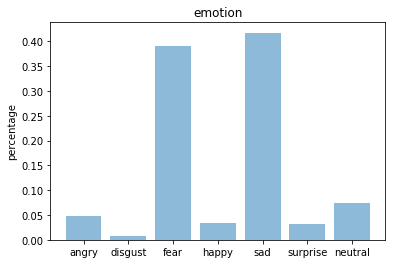

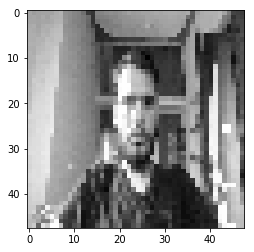

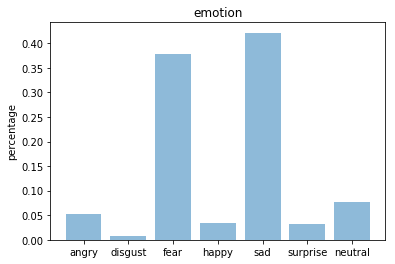

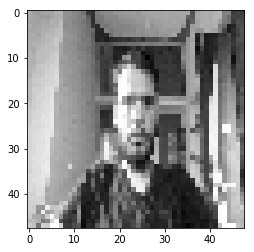

In [29]:

def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
for i in range(10,12):
    img = image.load_img(r"C:\Users\Hp\Pictures\Camera Roll\ajay{k}.jpg".format(k=i), grayscale=True, target_size=(48, 48))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = loaded_model.predict(x)
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(x)
    plt.show()

In [33]:
def emotion_analysiss(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    return y_pos
import subprocess as sp
sum_emotion = [0,0,0,0,0,0,0]
for z in range(0,7):
    for i in range(10,12):
        img = image.load_img(r"C:\Users\Hp\Pictures\Camera Roll\ajay{k}.jpg".format(k=i),color_mode= "grayscale", grayscale=True, target_size=(48, 48))
        x = image.img_to_array(img)
        y1=np.array(x).tolist()
        x = np.expand_dims(x, axis = 0)
        x /= 255
        custom = loaded_model.predict(x)
        y = emotion_analysiss(custom[0])
        sum_emotion[z]=sum_emotion[z]+custom[0].tolist()[z]
        #print(custom[0].tolist()[0])

C:\Users\Hp\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [34]:
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
dictword = dict(zip(objects,sum_emotion))
from operator import itemgetter
dict3 = sorted(dictword.items(), key = itemgetter(1), reverse=True)
for i in range(0,3):
    dict4 = dict3[i]
    print(dict4)

('sad', 0.8384376168251038)
('fear', 0.7669496536254883)
('neutral', 0.14966502785682678)
